# Logistic Regression

Logistic regression model estimated probability (Vectorised):

$$ \hat p = h_\theta(X) = \sigma(\theta^T \dot X) $$

Sigmoid:

$$ \sigma(t) = \frac{1}{1+exp(-t)}$$

Logistic Regression Model Prediction:

$$ \hat y = \begin{cases} 1 & \text{if  } \hat p < 0.5,\\ 0 & \text{if  } \hat p \geq 0.5. \end{cases} $$ 

Cost function of a single training instance:

$$ \hat y = \begin{cases} -log(\hat p) & \text{if  } y = 1,\\ -log(1 - \hat p) & \text{if  } \hat y=0. \end{cases} $$ 

Logistics regression cost function (log loss):

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} log(\hat p^{(i)}) + ( 1 - y^{(i)}) log(1-\hat p^{(i)})] $$

Logistic cost function partial derivative:

$$ \frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta_T \cdot x^{(i)}) - y^{(i)}) x^{(i)}_j $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [3]:
X = iris['data'][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

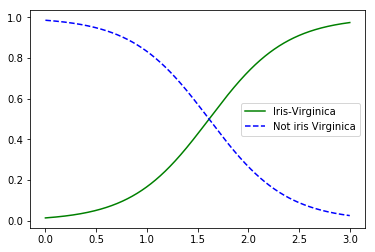

In [5]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not iris Virginica")
plt.legend()

In [81]:
y_proba[:, [0]] + y_proba[:, 1:]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

### Cross entropy

Cross entropy cost function:

$$ J(\Theta) = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} y_k^{(i)}log(\hat p^{(i)}_k) $$

In [10]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1,1),
        np.linspace(0, 8, 200).reshape(-1,1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y1_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

ValueError: cannot reshape array of size 1000 into shape (200,500)

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])